In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle
import matplotlib.image as mpimg
import matplotlib.lines as lines
import seaborn as sb

from scipy import stats
from matplotlib.ticker import NullFormatter # useful for `logit` scale
from matplotlib.ticker import FuncFormatter
from PIL import Image

%matplotlib inline

#### Line Plot

In [9]:
# x-axis values 
x = [5, 2, 9, 4, 7] 
  
# Y-axis values 
y = [10, 5, 8, 4, 2]

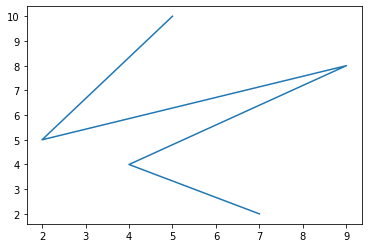

In [10]:
# Function to plot 
plt.plot(x,y) 
  
# function to show the plot 
plt.show()

#### Bar Plot

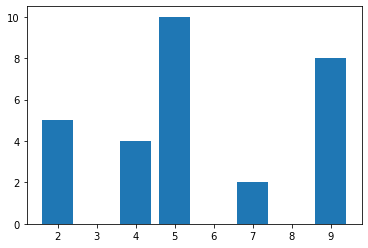

In [11]:
# Function to plot the bar 
plt.bar(x,y) 
  
# function to show the plot 
plt.show()

#### Histogram

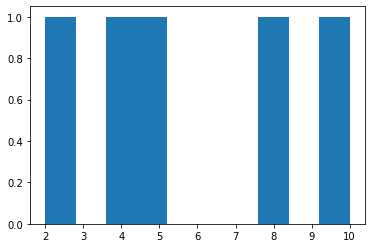

In [12]:
# Function to plot histogram 
plt.hist(y) 
  
# Function to show the plot 
plt.show()

#### Scatter Plot

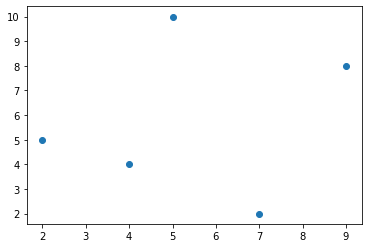

In [13]:
# Function to plot scatter 
plt.scatter(x, y) 
  
# function to show the plot 
plt.show()

#### No Axes Figure

<Figure size 432x288 with 0 Axes>

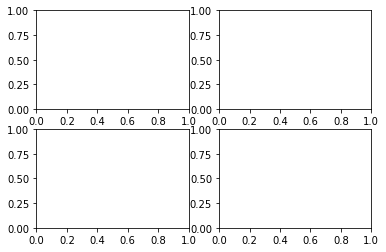

In [17]:
fig = plt.figure() # an empty figure with no axes
fig.suptitle('No axes on this figure') # Add a title so we know which it is
fig, ax_lst = plt.subplots(2, 2) # a figure with a 2x2 grid of Axes

## Types of Inputs to plot functions

#### Pandas

In [20]:
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a_asarray = a.values

#### Numpy Matrix

In [21]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)

#### Matplotlib, pyplot and pylab

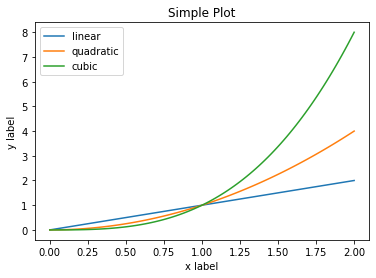

In [22]:
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

#### Subplots

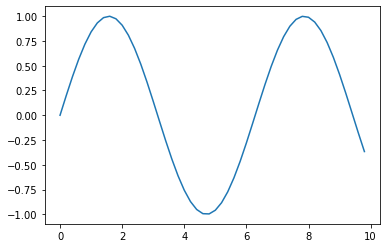

In [23]:
x = np.arange(0, 10, 0.2)
y = np.sin(x)
fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

#### A helper function to use a graph

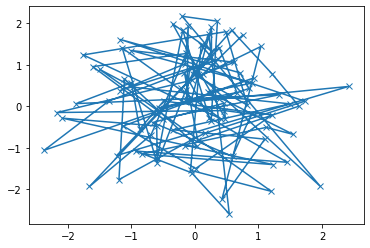

In [25]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    Parameters
    ----------
    ax : Axes
        The axes to draw to
    
    data1 : array
        The x data
    
    data2 : array
        The y data
    
    param_dict : dict
        Dictionary of kwargs to pass to ax.plot
    
    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# which you would then use as:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

#### Two subplots

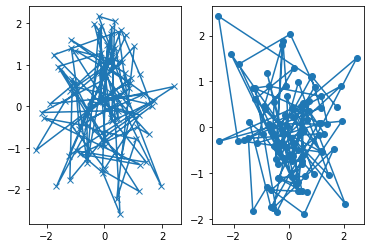

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Backends

In [27]:
backend : WXAgg # use wxpython with antigrain (agg) rendering

NameError: name 'WXAgg' is not defined

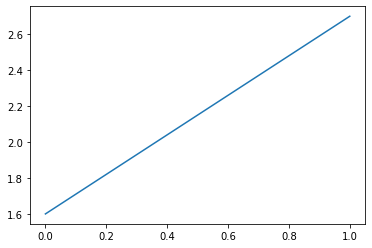

In [28]:
plt.ion()
plt.plot([1.6, 2.7])

Text(0.5, 0, 'index')

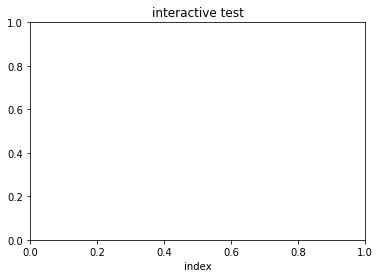

In [29]:
plt.title("interactive test")
plt.xlabel("index")

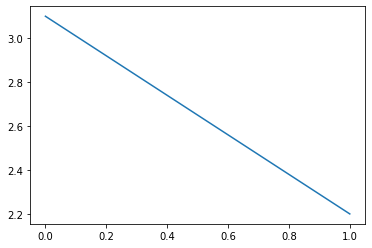

In [30]:
ax = plt.gca()
ax.plot([3.1, 2.2])

In [31]:
plt.draw()

<Figure size 432x288 with 0 Axes>

#### Non-interactive example

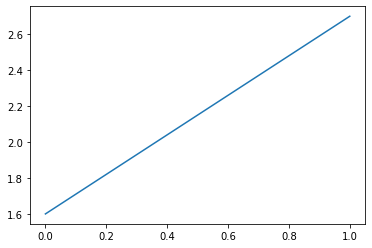

In [33]:
plt.ioff()
plt.plot([1.6, 2.7])
plt.show()

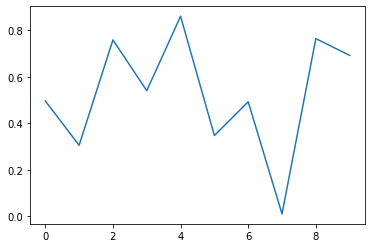

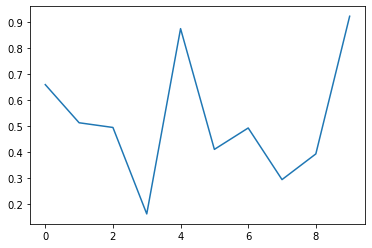

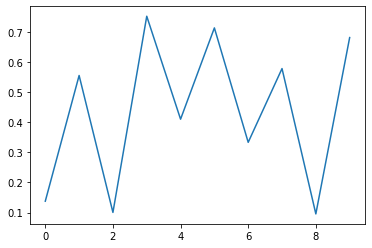

In [35]:
plt.ioff()
for i in range(3):
    plt.plot(np.random.rand(10))
    plt.show()

#### Line segment simplification

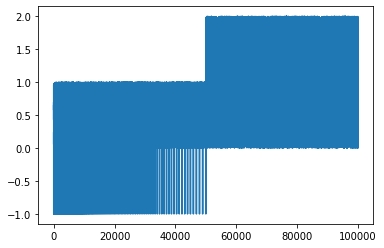

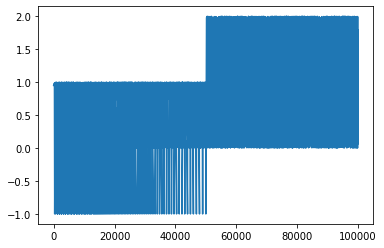

In [37]:
# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1, np.log10(50000), 400).astype(int)] = -1

mpl.rcParams['path.simplify'] = True

mpl.rcParams['path.simplify_threshold'] = 0.0
plt.plot(y)
plt.show()

mpl.rcParams['path.simplify_threshold'] = 1.0
plt.plot(y)
plt.show()

#### Marker simplification

ValueError: x and y must have same first dimension, but have shapes (50,) and (100000,)

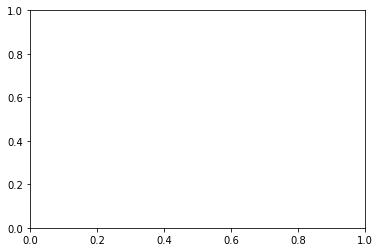

In [40]:
plt.plot(x, y, markevery=10)

#### Splitting lines into smaller chunks

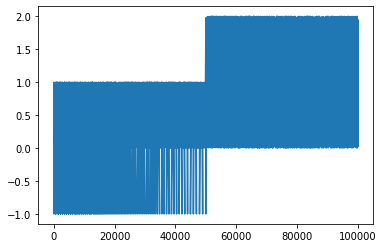

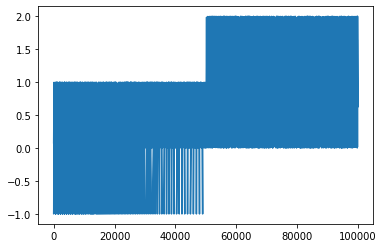

In [41]:
mpl.rcParams['path.simplify_threshold'] = 1.0

# Setup, and create the data to plot
y = np.random.rand(100000)
y[50000:] *= 2
y[np.logspace(1,np.log10(50000), 400).astype(int)] = -1

mpl.rcParams['path.simplify'] = True

mpl.rcParams['agg.path.chunksize'] = 0
plt.plot(y)
plt.show()

mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y)
plt.show()


## Legends


#### Using the fast style

In [43]:
mplstyle.use('fast')

In [44]:
mplstyle.use(['dark_background', 'ggplot', 'fast'])

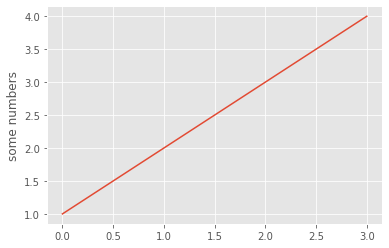

In [45]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

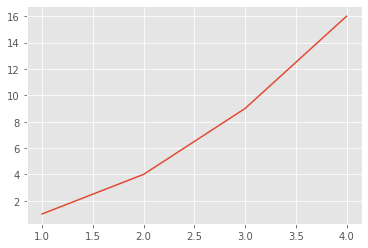

In [46]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

#### Formatting the style of your plot

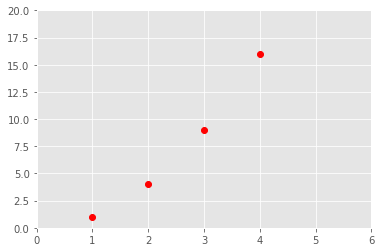

In [47]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

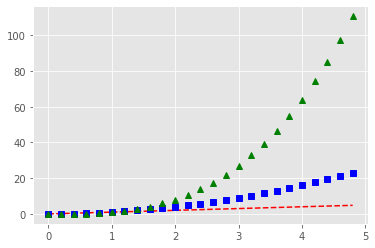

In [48]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

#### Plotting with keyword strings

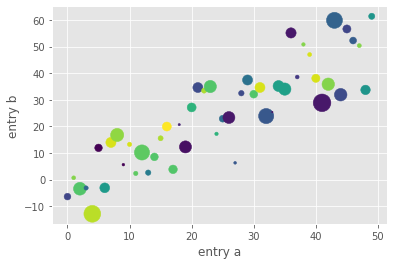

In [49]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

#### Plotting with categorical values

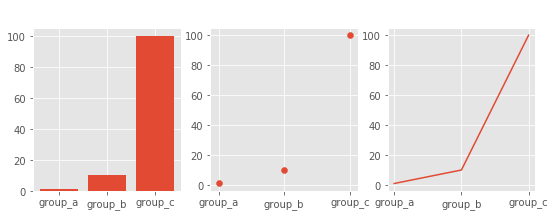

In [50]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## Controlling line properties

#### Use keyword args

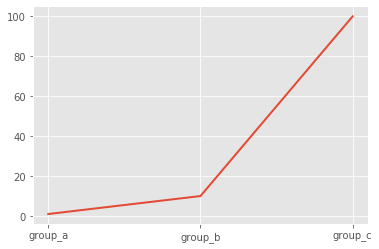

In [52]:
plt.plot(names, values, linewidth=2.0)

#### Use setter methods of line 2D

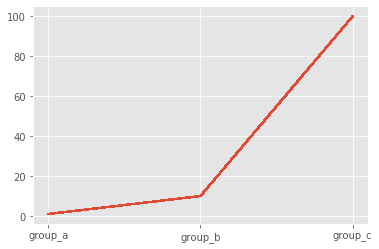

In [54]:
line, = plt.plot(names, values, '-')
line.set_antialiased(False) # turn off antialiasing

#### Use setp() command

[None, None, None, None]

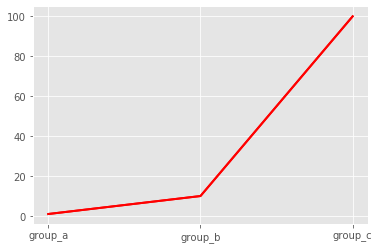

In [56]:
lines = plt.plot(names, values, names, values)

# use keyword args
plt.setp(lines, color='r', linewidth=2.0)

# or MATLAB style string value pairs
plt.setp(lines, 'color', 'r', 'linewidth', 2.0)

#### To get a list of settable line properties

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  dash_capstyle: {'butt', 'round', 'projecting'}
  dash_joinstyle: {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style
  markeredgecolor or mec: color
  markeredgewidth or mew: float
  markerfacecolor or mfc: color
  markerfacecoloralt or mfcalt: color
  markersize or ms: float
  m

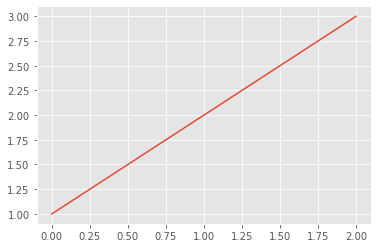

In [57]:
lines = plt.plot([1, 2, 3])
plt.setp(lines)

#### Working with multiple figures and axes

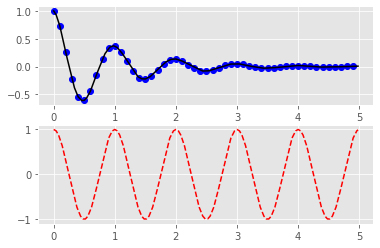

In [58]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Easy as 1, 2, 3')

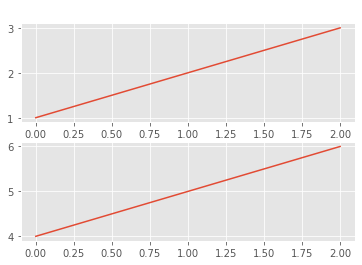

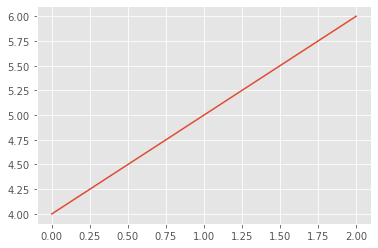

In [59]:
plt.figure(1) # the first figure
plt.subplot(211) # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212) # the second subplot in the first figure
plt.plot([4, 5, 6])

plt.figure(2) # a second figure
plt.plot([4, 5, 6]) # creates a subplot(111) by default

plt.figure(1) # figure 1 current; subplot(212) still current
plt.subplot(211) # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

#### Working with text

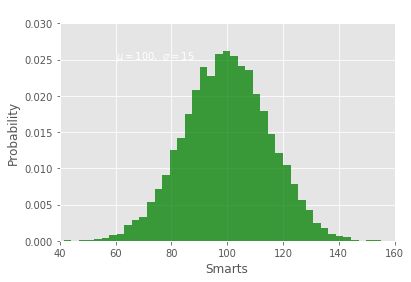

In [60]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

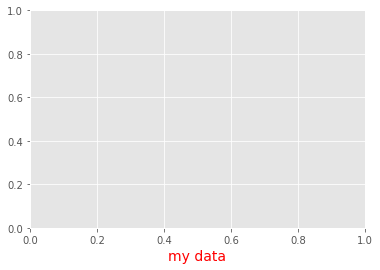

In [61]:
t = plt.xlabel('my data', fontsize=14, color='red')

#### Using mathematical expressions in text

Text(0.5, 1.0, '$\\sigma_i=15$')

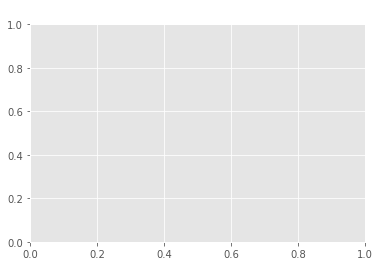

In [62]:
plt.title(r'$\sigma_i=15$')

#### Annotating text

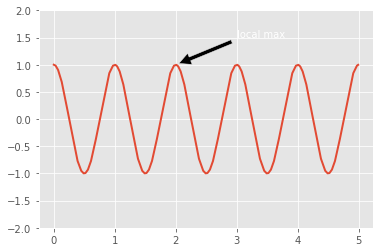

In [63]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2, 2)
plt.show()

## Ticker

#### Logarithmic and other nonlinear axes

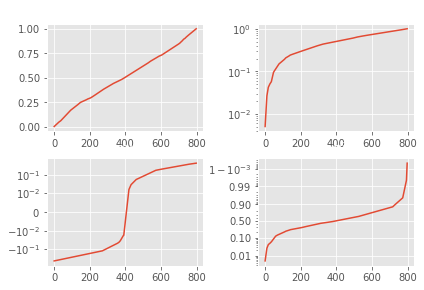

In [66]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the interval ]0, 1[
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
plt.gca().yaxis.set_minor_formatter(NullFormatter())

# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
wspace=0.35)
plt.show()

#### Playing with plots to display images

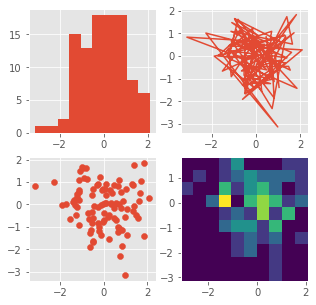

In [72]:
np.random.seed(19680801)
data = np.random.randn(2, 100)

fig, axs = plt.subplots(2, 2, figsize=(5, 5))

axs[0, 0].hist(data[0])
axs[1, 0].scatter(data[0], data[1])
axs[0, 1].plot(data[0], data[1])
axs[1, 1].hist2d(data[0], data[1])

plt.show()

In [97]:
img = mpimg.imread('stinkbug.png')

In [77]:
print(img)

[[0.39215687 0.39215687 0.39215687 ... 0.4        0.4        0.4       ]
 [0.39607844 0.39607844 0.39607844 ... 0.4        0.4        0.4       ]
 [0.39607844 0.39607844 0.39607844 ... 0.4        0.4        0.4       ]
 ...
 [0.40392157 0.40392157 0.4        ... 0.40784314 0.40784314 0.40784314]
 [0.40784314 0.40784314 0.40392157 ... 0.40784314 0.40784314 0.40784314]
 [0.40784314 0.40784314 0.40784314 ... 0.40784314 0.40784314 0.40784314]]


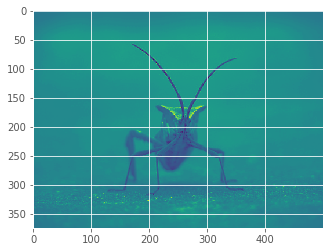

In [78]:
imgplot = plt.imshow(img)

In [82]:
lum_img = img[:, :]
# This is array slicing. You can read more in the `Numpy tutorial

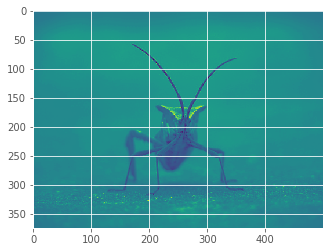

In [83]:
# <https://docs.scipy.org/doc/numpy/user/quickstart.html>`_.
plt.imshow(lum_img)

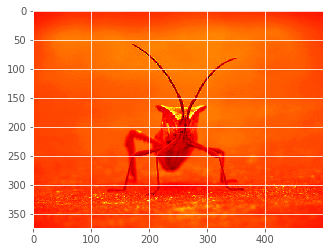

In [84]:
plt.imshow(lum_img, cmap="hot")

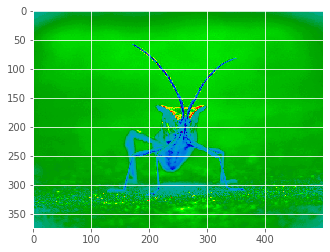

In [85]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral')

#### Color scale reference

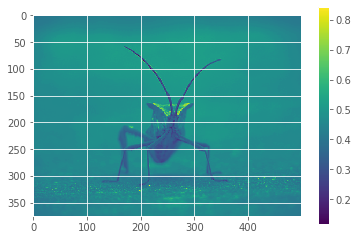

In [86]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

#### Examining a specific data range

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.6000e+01, 0.0000e+00, 7.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 1.0000e+01, 0.0000e+00, 1.1000e+01,
        2.9000e+01, 0.0000e+00, 0.0000e+00, 4.8000e+01, 0.0000e+00,
        2.4000e+01, 4.5000e+01, 0.0000e+00, 2.9000e+01, 5.2000e+01,
        0.0000e+00, 2.4000e+01, 6.6000e+01, 0.0000e+00, 5.2000e+01,
        9.6000e+01, 2.0600e+02, 0.0000e+00, 8.90

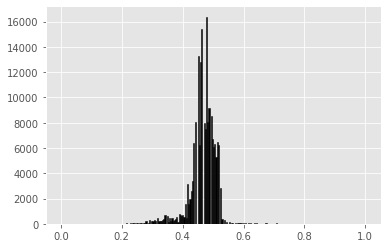

In [87]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

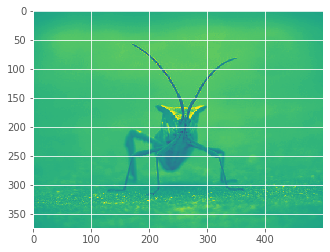

In [88]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))

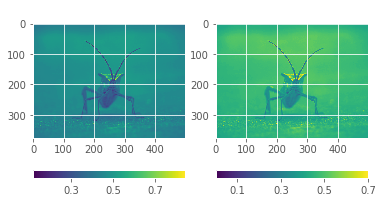

In [89]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

#### Array Interpolation schemes

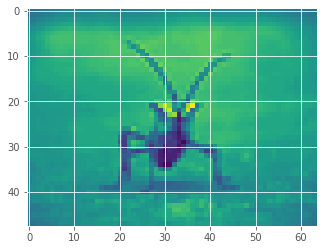

In [104]:
img = Image.open('stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot = plt.imshow(img)

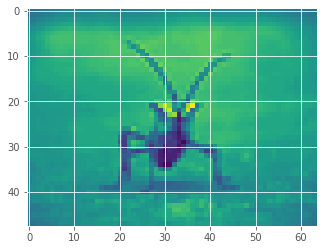

In [105]:
imgplot = plt.imshow(img, interpolation="nearest")

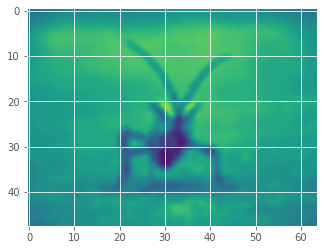

In [106]:
imgplot = plt.imshow(img, interpolation="bicubic")

## The Lifecycle of a Plot

#### Our data

In [108]:
# sphinx_gallery_thumbnail_number = 10

data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

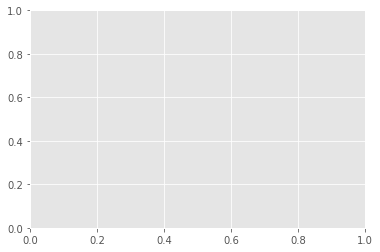

In [109]:
fig, ax = plt.subplots()

<BarContainer object of 10 artists>

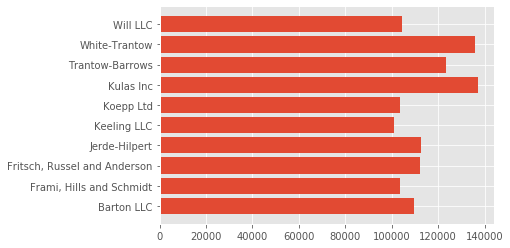

In [110]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

#### To see list of styles

In [111]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [112]:
plt.style.use('fivethirtyeight')

<BarContainer object of 10 artists>

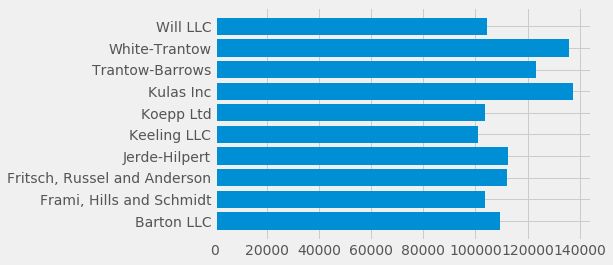

In [113]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

#### Customizing the plot

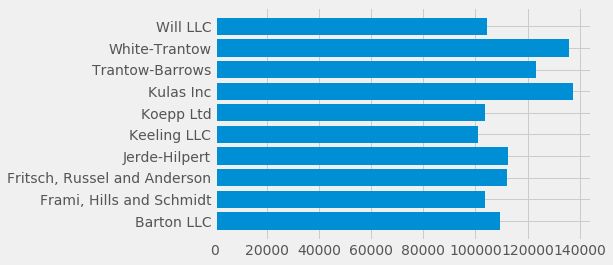

In [114]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

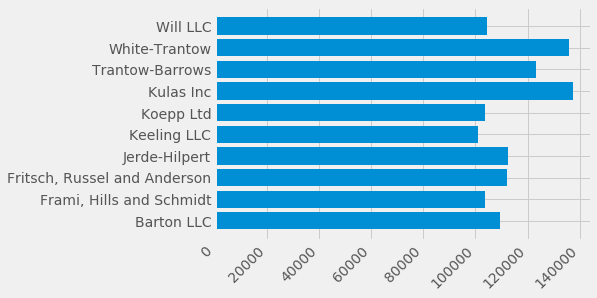

In [117]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

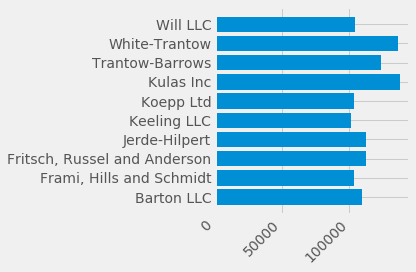

In [118]:
plt.rcParams.update({'figure.autolayout': True})

fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

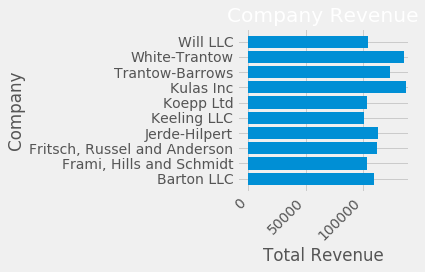

In [119]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
        title='Company Revenue')

[Text(0, 0.5, 'Company'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, 'Company Revenue')]

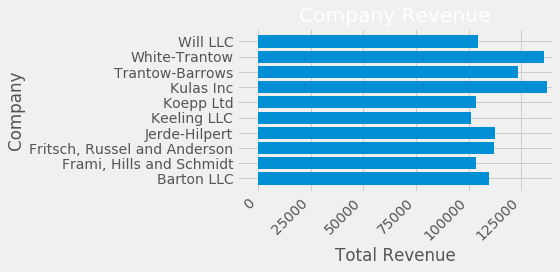

In [120]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
    title='Company Revenue')

In [121]:
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        s = '${:1.1f}M'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

formatter = FuncFormatter(currency)

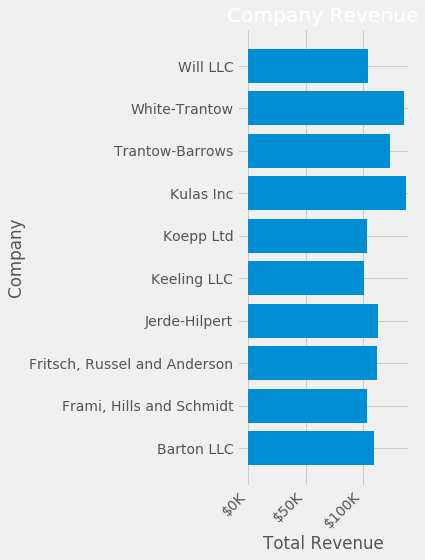

In [122]:
fig, ax = plt.subplots(figsize=(6, 8))

ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
        title='Company Revenue')

ax.xaxis.set_major_formatter(formatter)

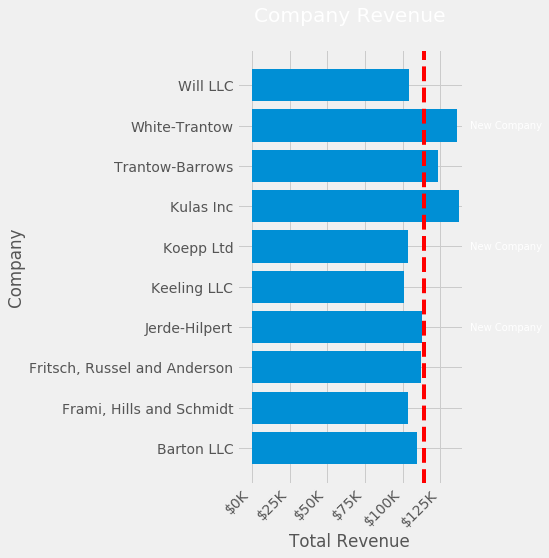

In [123]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')

# Add a vertical line, here we set the style in the function call
ax.axvline(group_mean, ls='--', color='r')

# Annotate new companies
for group in [3, 5, 8]:
    ax.text(145000, group, "New Company", fontsize=10,
        verticalalignment="center")

# Now we'll move our title up since it's getting a little cramped
ax.title.set(y=1.05)
ax.set(xlim=[-10000, 140000], xlabel='Total Revenue', ylabel='Company',
        title='Company Revenue')
ax.xaxis.set_major_formatter(formatter)
ax.set_xticks([0, 25e3, 50e3, 75e3, 100e3, 125e3])
fig.subplots_adjust(right=.1)

plt.show()

#### List of available options to save figures to files

In [124]:
print(fig.canvas.get_supported_filetypes())

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics'}


In [125]:
# Uncomment this line to save the figure.
# fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

In [126]:
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [127]:
mplstyle.use(['seaborn-dark', 'ggplot', 'fast'])

In [128]:
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16

NameError: name 'axes' is not defined

#### Temporary styling

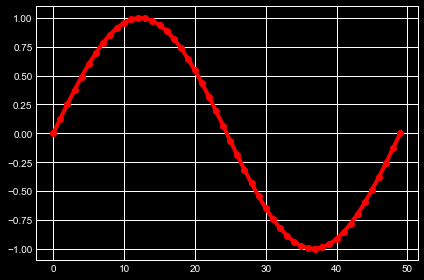

In [130]:
with plt.style.context('dark_background'):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

## matplotlib rcParams

#### Dynamic rc settings

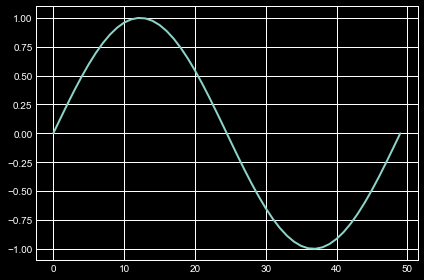

In [132]:
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
plt.plot(np.sin(np.linspace(0, 2 * np.pi)))

In [133]:
data = np.sin(np.linspace(0, 2 * np.pi))

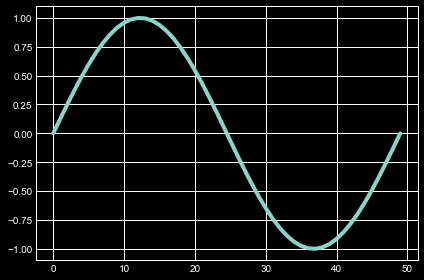

In [134]:
mpl.rc('lines', linewidth=4, color='g')
plt.plot(data)

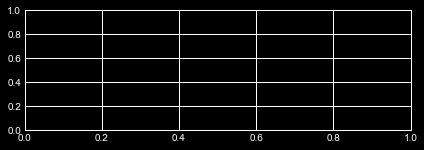

In [135]:
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


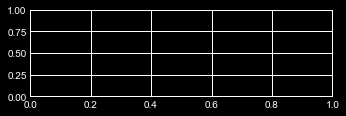

In [136]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

In [137]:
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

In [138]:
ax.lines[0]

In [139]:
line

In [140]:
del ax.lines[0]
ax.lines.remove(line) # one or the other, not both!

ValueError: list.remove(x): x not in list

In [141]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

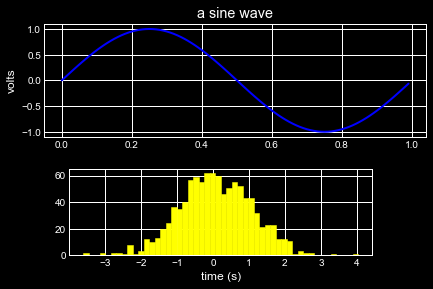

In [142]:
fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)
ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])

n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

In [146]:
ax = fig.add_subplot(111)
rect = ax.patch # a Rectangle instance
rect.set_facecolor('green')

In [147]:
x, y = np.random.rand(2, 100)
line, = ax.plot(x, y, '-', color='blue', linewidth=2)
print(ax.lines)

In [148]:
n, bins, rectangles = ax.hist(np.random.randn(1000), 50, facecolor='yellow')

In [149]:
rectangles

<a list of 50 Patch objects>

In [150]:
print(len(ax.patches))

50


In [158]:
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

AttributeError: 'Rectangle' object has no attribute 'get_axes'

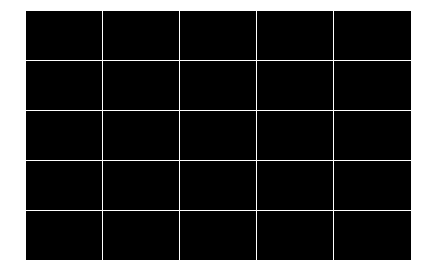

In [159]:
fig, ax = plt.subplots()

# create a rectangle instance
rect = matplotlib.patches.Rectangle( (1,1), width=5, height=12)

# by default the axes instance is None
print(rect.get_axes())

In [160]:


# and the transformation instance is set to the "identity transform"
print(rect.get_transform())

# now we add the Rectangle to the Axes
ax.add_patch(rect)

# and notice that the ax.add_patch method has set the axes
# instance
print(rect.get_axes())

# and the transformation has been set too
print(rect.get_transform())

# the default axes transformation is ax.transData
print(ax.transData)

# notice that the xlimits of the Axes have not been changed
print(ax.get_xlim())

# but the data limits have been updated to encompass the rectangle
print(ax.dataLim.bounds)

# we can manually invoke the auto-scaling machinery
ax.autoscale_view()

# and now the xlim are updated to encompass the rectangle
print(ax.get_xlim())

# we have to manually force a figure draw
ax.figure.canvas.draw()

CompositeGenericTransform(
    BboxTransformTo(
        Bbox(x0=1.0, y0=1.0, x1=6.0, y1=13.0)),
    Affine2D(
        [[1. 0. 0.]
         [0. 1. 0.]
         [0. 0. 1.]]))


AttributeError: 'Rectangle' object has no attribute 'get_axes'